In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
imputed_file = '../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_CNN-LSTM_imputed.csv'#'../01_data/01_PreEPW/imputed_SARIMA_0_1_1.csv"
to_epw_file= "../../01_weather_data/04_to_EPWs/cnn_to_epw_mae.csv"
epw = pd.read_csv(imputed_file,
                 index_col=0,
                 parse_dates=True)
epw.fillna(0,inplace=True)


In [3]:
epw

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817


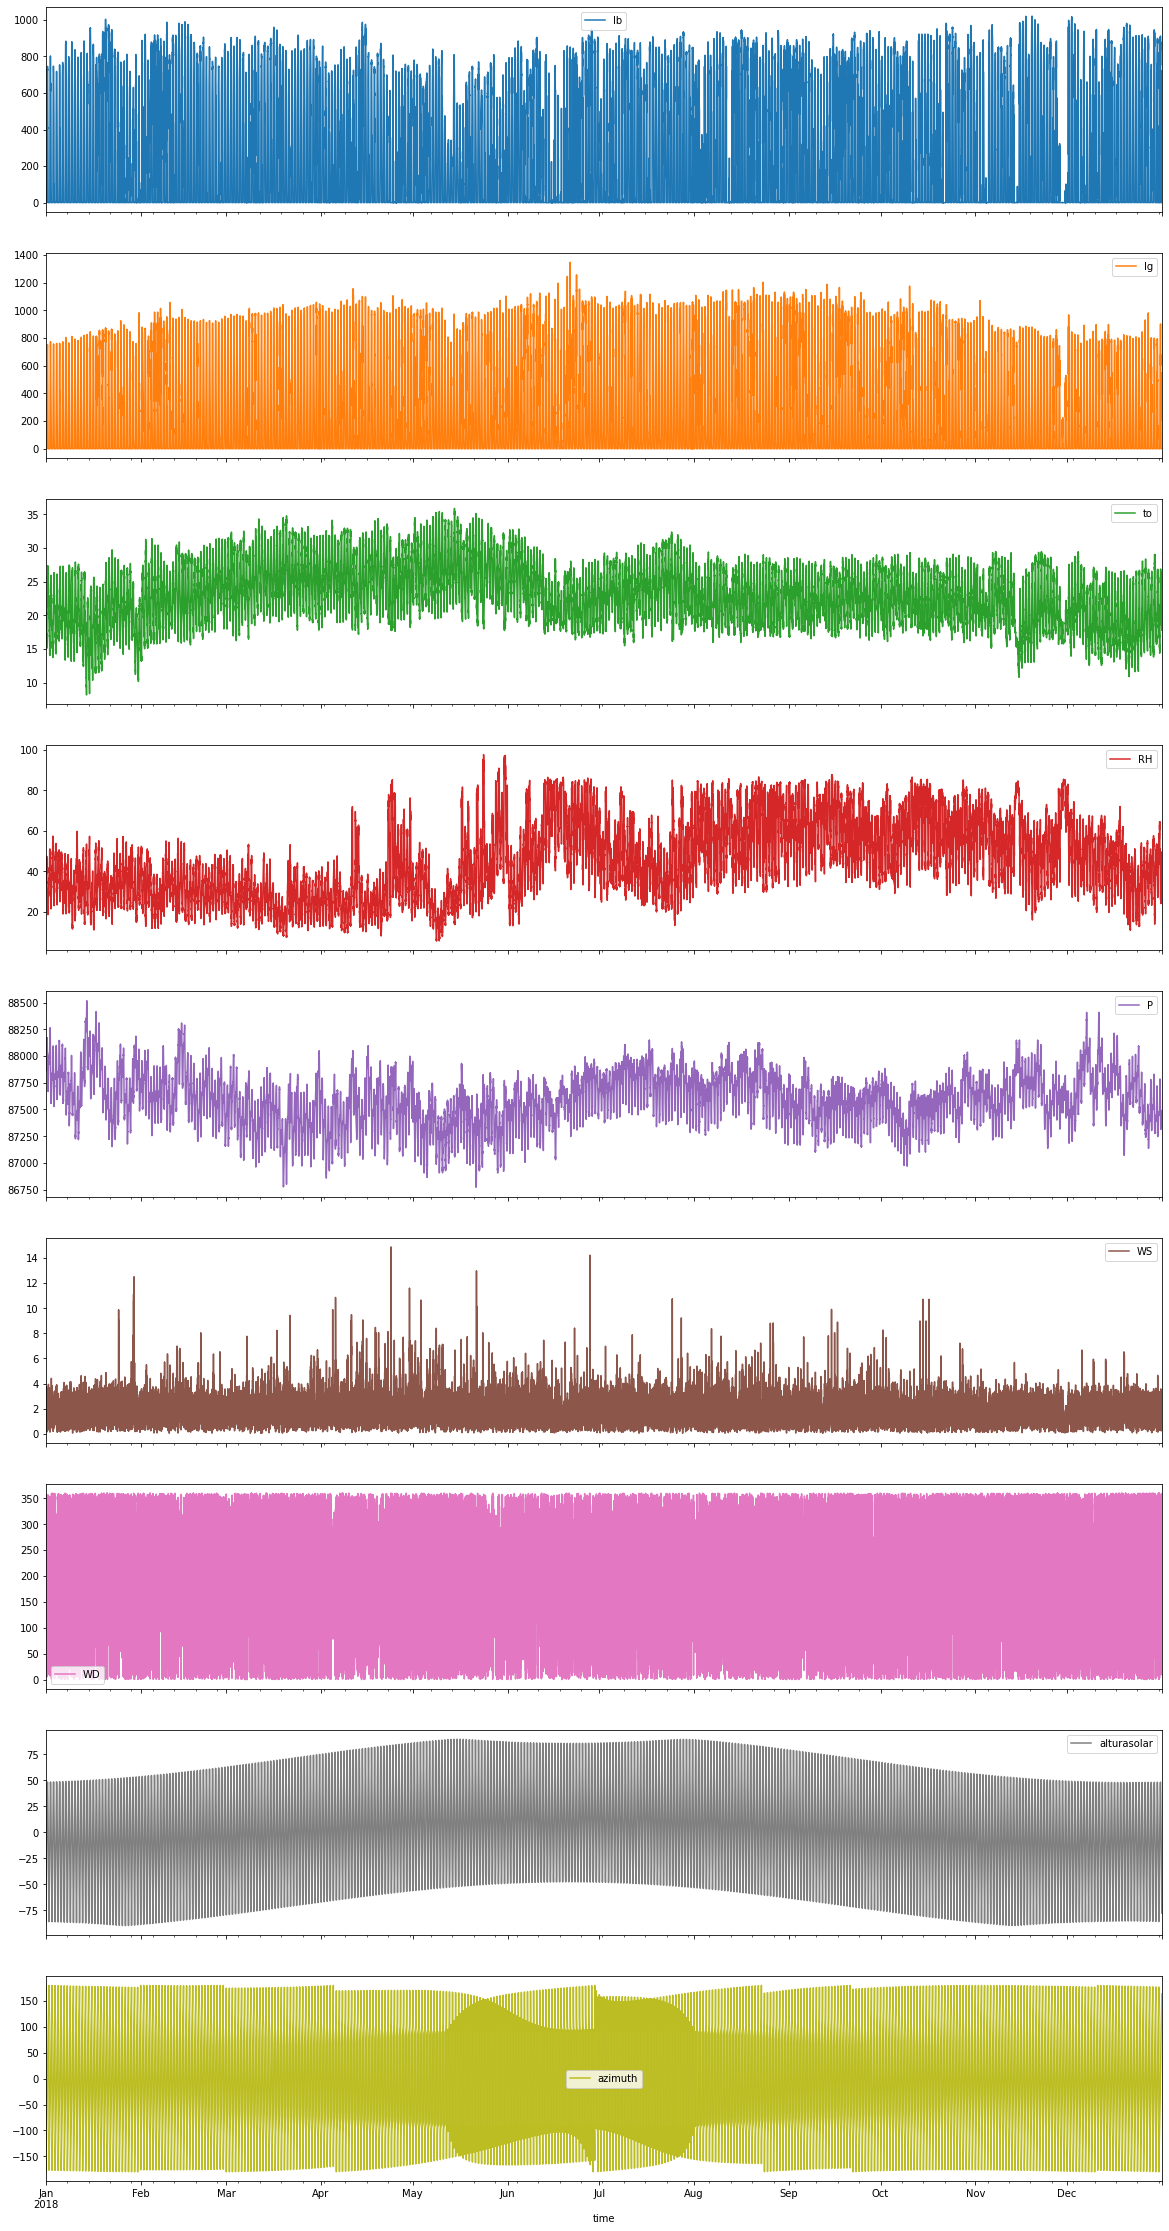

In [4]:
epw.plot(subplots=True,figsize=(20,40));

In [5]:
def df2epw(df):
    df['anio']    = df.index.year
    df['mes']     = df.index.month
    df['dia']     = df.index.day
    df['hora']    = df.index.hour
    df['minutos'] = df.index.minute
    return df[1:]

In [6]:

columnas = ['anio','mes','dia','hora','minutos',
            'to','RH','P',"Ig","Ib",'WD','WS']
tmp = df2epw(epw)

tmp.to_csv(to_epw_file,
           columns=columnas,header=False,index=False)


In [7]:
tmp

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth,anio,mes,dia,hora,minutos
time,,,,,,,,,,,,,,
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.700,-81.878940,170.053742,2018,1,1,0,10
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.000,-83.764991,173.367191,2018,1,1,0,20
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.500,-85.236372,176.703016,2018,1,1,0,30
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.000,-85.827949,-179.949903,2018,1,1,0,40
2018-01-01 00:50:00,0.0,0.0,19.23,35.40,87889.36,1.468,6.668,-85.202271,-176.602993,2018,1,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.200,-68.725457,151.345160,2018,12,31,23,10
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.500,-71.001501,154.338568,2018,12,31,23,20
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.700,-73.264218,157.400817,2018,12,31,23,30


In [8]:
len(tmp.Ig)

52559

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

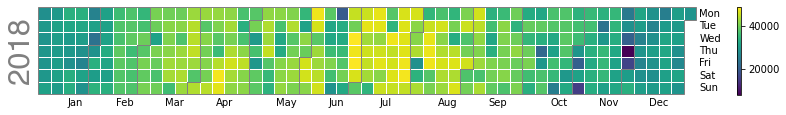

In [9]:
import calplot
calplot.calplot(tmp.Ig)

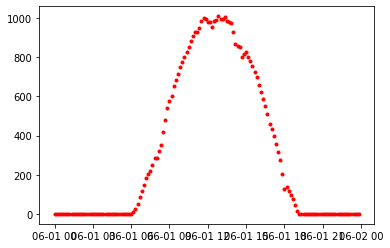

In [10]:
plt.plot(tmp.Ig.loc['2018-06-01'],'r.')

In [10]:
# auxiliary programs > weather converter